# Colour Quantization using K-Means Clustering

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
plt.style.use("fivethirtyeight")
from skimage import io, color, img_as_ubyte
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from assets.functions.plot_utils import plot_utils
from sklearn.metrics import silhouette_score

## Reading image using IO

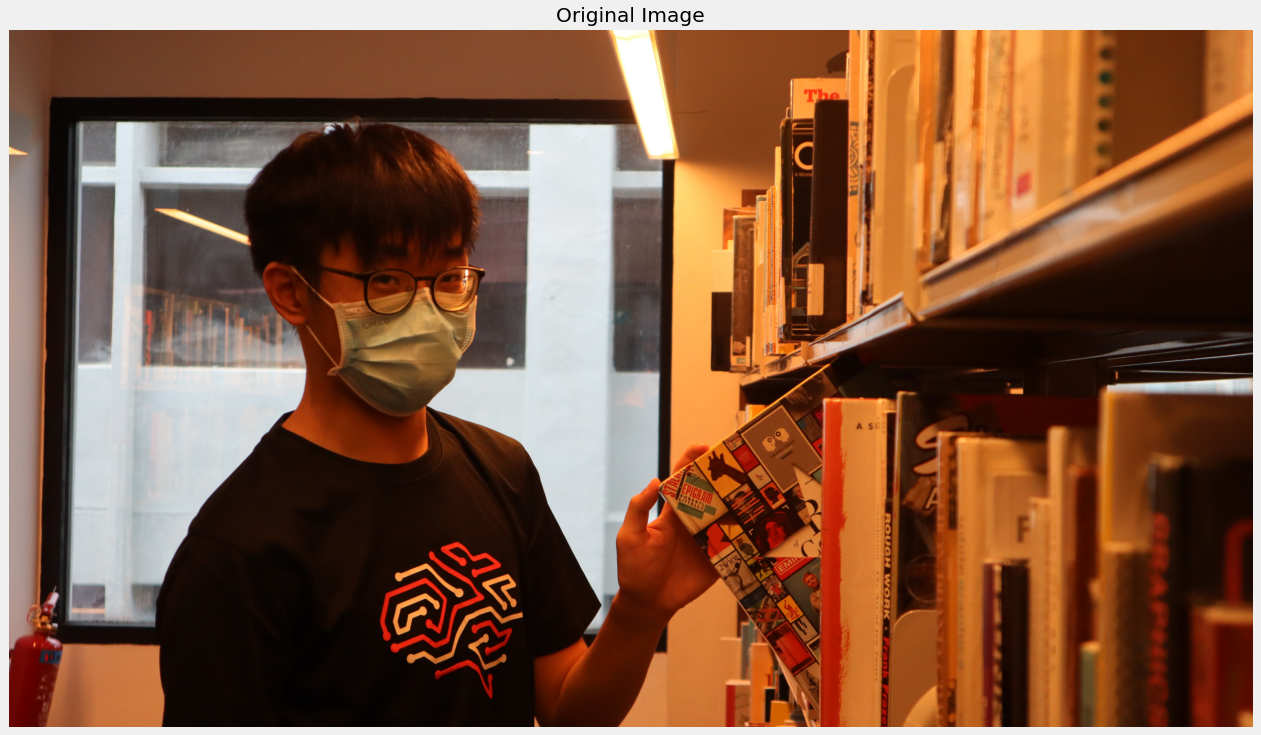

Shape: (3368, 6000, 3)
Size: 60624000
Bytes: 60624000


In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

# reading image
image = io.imread('./assets/raw/Original.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image)
ax.set_title('Original Image')
plt.show()

# image description
print('Shape:', image.shape)
print('Size:', image.size)
print('Bytes:', image.nbytes)

## Preprocessing

divide the image size by 255 because that is the maximum intensity value for RGB individually and reshape the image such that it each column vector represents a colour channel.

$$ X_{norm} = \frac {X - X_{min}} {X_{max} - X_{min}} $$

In [3]:
# scaling and reshaping


image_data = (image / 255).reshape(-1, 3)
print(image_data)

[[0.42745098 0.29019608 0.20392157]
 [0.40784314 0.27058824 0.18431373]
 [0.40392157 0.26666667 0.18039216]
 ...
 [0.79607843 0.48627451 0.22745098]
 [0.79607843 0.48627451 0.22745098]
 [0.79215686 0.48235294 0.22352941]]


## 2D Colorspace

Colorspace is the specific organization of colours in physical appearance where any 2 images having the same colour model can have entirely different colorspace.

In [4]:
from assets.functions.plot_utils import plot_utils
x = plot_utils(image_data, title="Input colour space: over 16 million possible colours")
x.colorSpace()

In [ ]:
x.colorSpace3d()

In [ ]:
%%time
km = MiniBatchKMeans(n_clusters=4, max_iter=500, batch_size=3072).fit(image_data)
k_colors = km.cluster_centers_[km.labels_]

In [ ]:
km.cluster_centers_

In [ ]:
y = plot_utils(image_data, colors=k_colors, title="Reduced color space: 4 colours", 
    centroids=km.cluster_centers_)
y.colorSpace()

In [ ]:
y.colorSpace3d()

In [ ]:
k_img = img_as_ubyte(np.reshape(k_colors,(image.shape)))
    
fig, (ax1, ax2) = plt.subplots(2, 1, tight_layout=True)


ax2.set_title('Compressed - 4 colours')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.imshow(k_img)

ax1.set_title('Original - over 16 million possible colours')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(image)
plt.show()

In [ ]:
def compress_img(n_colors, image):
    image_data = (image / 255).reshape(-1, 3)
    km = MiniBatchKMeans(n_clusters=n_colors, max_iter=500, batch_size=3072).fit(image_data)
    k_colors = km.cluster_centers_[km.labels_]
    k_img = np.reshape(k_colors,(image.shape))
    return k_img, km.inertia_

In [ ]:
%%time
with plt.style.context('ggplot'):
    score = {}
    fig = plt.figure(tight_layout=True, dpi=150)
    # 
    for i, n in enumerate([4**i for i in np.arange(1, 5)]):
        print(f'k={n}')
        k_img, score[n] = compress_img(n, image)
        ax = fig.add_subplot(4, 1, i+1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(k_img)
        ax.set_title(f'Compressed $(k={n})$', fontsize=12)
        io.imsave(f'./assets/raw/Compressed - {n} colours.jpg', (k_img*255).astype(np.uint8))
    plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
pd.Series(score).plot(kind='bar')
plt.ylabel('Within Cluster Sum of Squares')
plt.xlabel('k')
plt.title('Compression by k')
plt.show()